In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
AMZ = pd.read_csv('./StockHistoricalData/AMZ_historical.csv')

In [3]:
AMZ

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-01-03,8.794500,8.974000,8.777500,8.951500,102216000,0,0
1,2012-01-04,8.960500,9.025000,8.803500,8.875500,84104000,0,0
2,2012-01-05,8.797000,8.912500,8.702500,8.880500,76182000,0,0
3,2012-01-06,8.903500,9.232500,8.875000,9.130500,140168000,0,0
4,2012-01-09,9.138000,9.218500,8.850000,8.928000,101138000,0,0
...,...,...,...,...,...,...,...,...
2512,2021-12-27,171.037003,172.942993,169.215500,169.669495,58688000,0,0
2513,2021-12-28,170.182495,172.175995,169.135498,170.660995,54638000,0,0
2514,2021-12-29,170.839996,171.212006,168.600494,169.201004,35754000,0,0
2515,2021-12-30,169.699997,170.888000,168.524002,168.644501,37584000,0,0


In [4]:
AMZ_price = AMZ.drop(['Open','High','Low','Volume','Dividends','Stock Splits'], axis=1)

In [5]:
AMZ_price

,Date,Close
0,2012-01-03,8.951500
1,2012-01-04,8.875500
2,2012-01-05,8.880500
3,2012-01-06,9.130500
4,2012-01-09,8.928000
...,...,...
2512,2021-12-27,169.669495
2513,2021-12-28,170.660995
2514,2021-12-29,169.201004
2515,2021-12-30,168.644501


In [6]:
# from sklearn.model_selection import train_test_split

In [7]:
# X_train, X_test = train_test_split(AMZ_price, train_size=0.1, shuffle=False)

In [8]:
# actual_price = X_train
# actual_price

In [9]:
# pip install Cython
#!pip --version

In [10]:
# !pip install --upgrade plotly

In [11]:
from prophet import Prophet

In [13]:
AMZ_price = AMZ_price.rename(columns={'Date':'ds', 'Close':'y'})

In [14]:
AMZ_price

,ds,y
0,2012-01-03,8.951500
1,2012-01-04,8.875500
2,2012-01-05,8.880500
3,2012-01-06,9.130500
4,2012-01-09,8.928000
...,...,...
2512,2021-12-27,169.669495
2513,2021-12-28,170.660995
2514,2021-12-29,169.201004
2515,2021-12-30,168.644501


In [15]:
my_model = Prophet(interval_width=0.95)
my_model.fit(AMZ_price)

13:55:55 - cmdstanpy - INFO - Chain [1] start processing
13:55:56 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
AMZ_price

future = my_model.make_future_dataframe(periods=1)

In [23]:
future

,ds
0,2012-01-03
1,2012-01-04
2,2012-01-05
3,2012-01-06
4,2012-01-09
...,...
2513,2021-12-28
2514,2021-12-29
2515,2021-12-30
2516,2021-12-31


In [24]:
forecast = my_model.predict(future)

In [25]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2513,2021-12-28,187.682472,173.381891,201.080820
2514,2021-12-29,187.948739,174.024345,202.166521
2515,2021-12-30,188.152123,174.050829,201.853386
2516,2021-12-31,188.160330,174.266700,201.804483
2517,2022-01-01,188.347934,173.704130,201.789303


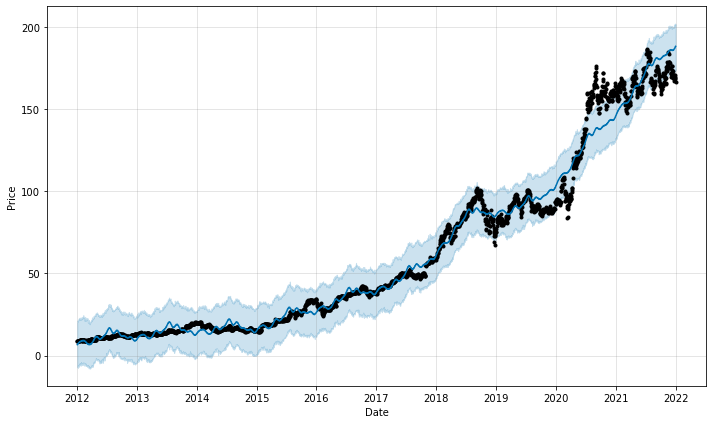

In [30]:
fig1 = my_model.plot(forecast, xlabel='Date',ylabel='Price')

In [49]:
new_forecast=forecast.set_index('ds')
new_forecast=new_forecast[['yhat','yhat_upper','yhat_lower']]

In [50]:
new_forecast

,yhat,yhat_upper,yhat_lower
ds,,,
2012-01-03,6.640680,20.149825,-6.188615
2012-01-04,6.828133,20.600668,-6.889775
2012-01-05,6.943978,21.469443,-6.080916
2012-01-06,6.856136,20.743946,-7.508125
2012-01-09,7.308601,21.750300,-6.027095
...,...,...,...
2021-12-28,187.682472,201.080820,173.381891
2021-12-29,187.948739,202.166521,174.024345
2021-12-30,188.152123,201.853386,174.050829


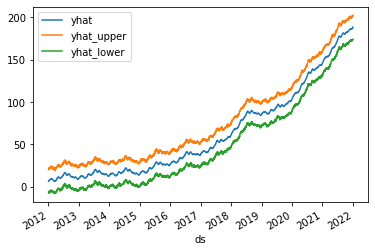

In [61]:
pic=forecast.plot(x='ds',y=['yhat','yhat_upper','yhat_lower'])

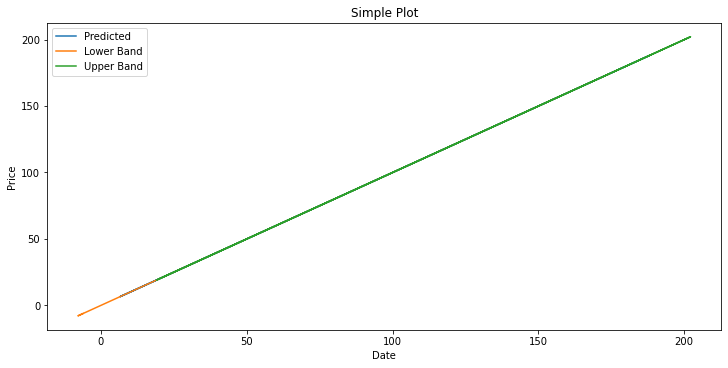

In [53]:
# fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
# ax.plot(new_forecast['yhat'], new_forecast['yhat'], label='Predicted')  
# ax.plot(forecast['yhat_lower'], forecast['yhat_lower'], label='Lower Band')  
# ax.plot(forecast['yhat_upper'], forecast['yhat_upper'], label='Upper Band')  
# ax.set_xlabel('Date')  
# ax.set_ylabel('Price')  
# ax.set_title("Simple Plot")  
# ax.legend()

In [ ]:
# AMZ

In [ ]:
# def dataPreprocessing(stockInfo, window_size=90, future_period=1):
#     actual_price = stockInfo[['Date', 'Close']].rename(columns={'Date':'ds', 'Close':'y'})
#     # ret = pd.DataFrame(columns=["ds", "y", "yhat", "yhat_lower", "yhat_upper"])
# #     ret = pd.DataFrame(actual_price)
# #     ret = pd.concat([actual_price,forecast],axis)
#     ret = pd.DataFrame(columns=["ds", "y", "yhat", "yhat_lower", "yhat_upper"])
    
#     for i in range(len(actual_price) - window_size):
#         cur_window = actual_price[i: i+window_size]
        
#         my_model = Prophet(interval_width=0.95)
#         my_model.fit(cur_window)
#         future = my_model.make_future_dataframe(periods=future_period)
#         forecast = my_model.predict(future)[["yhat", "yhat_lower", "yhat_upper"]]
        
# #         ret.loc[: window_size, "ds"] = cur_window["ds"]
#         # ret[:window_size][["ds", "y"]] = cur_window
#         # ret[:window_size + future_period][["yhat", "yhat_lower", "yhat_upper"]] = forecast[["yhat", "yhat_lower", "yhat_upper"]]
        
#         ret_window = pd.concat([actual_price, forecast],axis=1)
#         print("====")
#         print(ret_window[80: 100])
#         ret = pd.concat([ret, ret_window], axis = 0)
# #         print(cur_window)
# #         print("-"* 20)
# #         print(forecast)
# #         print("==" * 20)
# #         print(ret[:window_size + future_period])
# #         break
#         if i > 5:
#             break
#     return ret

In [ ]:
# ret = dataPreprocessing(AMZ)

In [ ]:
# ret[80: 100]

In [ ]:
# forecast[['ds','yhat','yhat_lower','yhat_upper']]